In [1]:
import numpy as np
import matplotlib.pyplot as plt

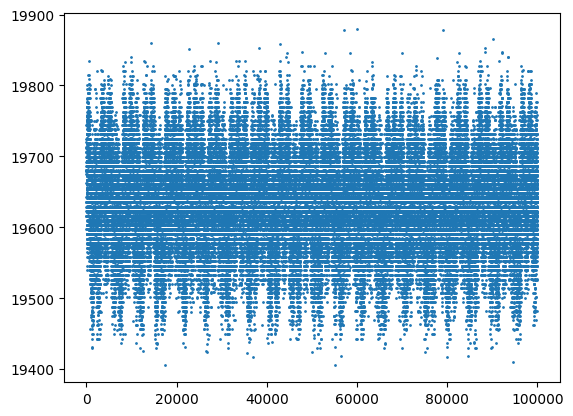

In [2]:
'''
Load comparison
'''
lat = np.load('processed-data/4switches/lat_1723_080724.npy')[:-2]
lat10 = np.load('processed-data/4switches/lat_load10_1718_080724.npy')
lat20 = np.load('processed-data/4switches/lat_load20_1725_080724.npy')
lat30 = np.load('processed-data/4switches/lat_load30_1727_080724.npy')
lat40 = np.load('processed-data/4switches/lat_load40_1729_080724.npy')
lat50 = np.load('processed-data/4switches/lat_load50_1730_080724.npy')
lat60 = np.load('processed-data/4switches/lat_load60_1734_080724.npy')
lat70 = np.load('processed-data/4switches/lat_load70_1736_080724.npy')
lat80 = np.load('processed-data/4switches/lat_load80_1750_080724.npy')
lat90 = np.load('processed-data/4switches/lat_load90_1716_080724.npy')
# negative latency values in lat90 due to packet loss or similar. Filter out for now
lat90 = lat90[lat90 > 0]

lats = [lat, lat10, lat20, lat30, lat40, lat50, lat60, lat70, lat80, lat90]


y = lat
x = np.arange(len(y))
fig,ax = plt.subplots(1,1)
ax.scatter(x,y,s=1)

In [62]:
y_mean = np.array([])
y_low = np.array([])
low_percentile = 5
high_percentile = 95
y_high = []
for l in lats:
    y_mean = np.append(y_mean,np.mean(l))
    y_low = np.append(y_low, np.percentile(l, low_percentile))
    y_high = np.append(y_high,np.percentile(l, high_percentile))
    
print(f'mean: {y_mean}')
print(f'{low_percentile} percentile: {y_low}')
print(f'{high_percentile} percentile: {y_high}')

mean: [19635.09203184 21023.28138281 22440.93948949 25988.58686687
 24420.67357357 30824.22563564 33623.51505506 36538.31936937
 39350.46294294 43312.81899009]
5 percentile: [19526. 19526. 19526. 19532. 19533. 19545. 19552. 19565. 19591. 34874.]
95 percentile: [19743. 23872. 47942. 48007. 47981. 48039. 48057. 48064. 48070. 48052.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


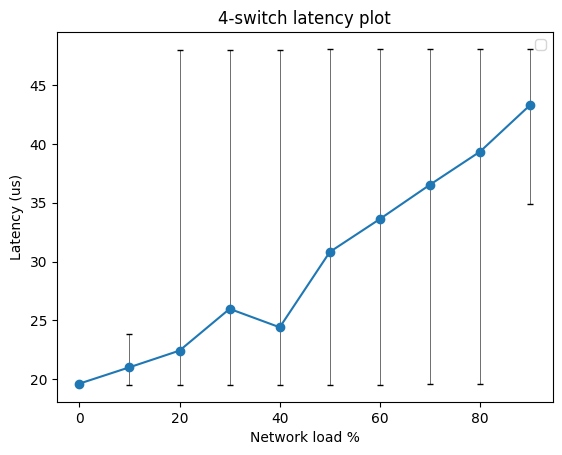

In [81]:
x = np.arange(0,100,10)
y_err = np.concatenate((y_mean - y_low,y_high - y_mean)).reshape((2,len(y_low))) / 1000
fig,ax = plt.subplots(1,1)
ax.errorbar(x,y_mean / 1000,yerr=y_err,ecolor='black',elinewidth=0.4,capsize=2,marker='o')

ax.set_title('4-switch latency')
ax.set_xlabel('Network load %')
ax.set_ylabel('Latency (us)')